# Analysis of the rankings obtained in the diseasome hypergraph

In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import scienceplots

plt.style.use(['science', 'no-latex'])

from collections import defaultdict

In [2]:
df = pandas.read_csv("../../Output/diseasome_dataframe.csv")

In [3]:
df

,CEC,UPHEC-2,UPHEC-3,UPHEC-4,UPHEC-5,UPHEC-6,UPHEC-7,UPHEC-8,UPHEC-9,HEC-2unif,...,HEC-9unif,HEC-11unif,AltUnif-2,AltUnif-3,AltUnif-4,AltUnif-5,AltUnif-6,AltUnif-7,AltUnif-8,AltUnif-9
0,3.129821e-11,0.000507,0.000554,0.000571,0.000658,0.000657,0.000643,0.000615,0.000610,0.005243,...,0.111111,0.090909,0.000507,0.000423,0.000421,0.000500,0.000602,0.000708,0.000840,0.000931
1,2.563859e-07,0.000995,0.000800,0.000669,0.000678,0.000667,0.000651,0.000622,0.000616,0.006922,...,0.111111,0.090909,0.000995,0.000843,0.000576,0.000347,0.000096,0.000088,0.000107,0.000179
2,1.576598e-06,0.001236,0.000624,0.000552,0.000558,0.000577,0.000582,0.000571,0.000579,0.036381,...,0.111111,0.090909,0.001236,0.000452,0.000332,0.000150,0.000178,0.000243,0.000375,0.000610
3,5.842519e-09,0.000799,0.000360,0.000412,0.000510,0.000545,0.000560,0.000556,0.000566,0.024475,...,0.111111,0.090909,0.000799,0.000242,0.000135,0.000049,0.000033,0.000030,0.000037,0.000059
4,3.621236e-08,0.001854,0.001938,0.001221,0.000592,0.000336,0.000425,0.000482,0.000538,0.003527,...,0.111111,0.090909,0.001854,0.001994,0.001263,0.000526,0.000017,0.000017,0.000022,0.000034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,1.571517e-07,0.003169,0.006823,0.010134,0.011807,0.012442,0.012232,0.011307,0.008886,0.000000,...,0.000000,0.000000,0.003169,0.007027,0.010579,0.013171,0.013386,0.011592,0.009064,0.005858
512,3.144805e-10,0.000855,0.000680,0.000576,0.000642,0.000648,0.000639,0.000614,0.000610,0.000000,...,0.000000,0.000000,0.000855,0.000611,0.000329,0.000074,0.000053,0.000047,0.000056,0.000093
513,2.679127e-07,0.001720,0.001277,0.000707,0.000473,0.000515,0.000541,0.000551,0.000573,0.000000,...,0.000000,0.000000,0.001720,0.001271,0.000571,0.000057,0.000043,0.000046,0.000067,0.000117
514,6.575830e-05,0.001280,0.000699,0.000658,0.000726,0.000711,0.000689,0.000656,0.000648,0.000000,...,0.000000,0.000000,0.001280,0.000430,0.000286,0.000266,0.000233,0.000317,0.000472,0.000720


In [4]:
df.sum() # consistency check

CEC           1.0
UPHEC-2       1.0
UPHEC-3       1.0
UPHEC-4       1.0
UPHEC-5       1.0
UPHEC-6       1.0
UPHEC-7       1.0
UPHEC-8       1.0
UPHEC-9       1.0
HEC-2unif     1.0
HEC-3unif     1.0
HEC-6unif     1.0
HEC-4unif     1.0
HEC-8unif     1.0
HEC-7unif     1.0
HEC-5unif     1.0
HEC-10unif    1.0
HEC-9unif     1.0
HEC-11unif    1.0
AltUnif-2     1.0
AltUnif-3     1.0
AltUnif-4     1.0
AltUnif-5     1.0
AltUnif-6     1.0
AltUnif-7     1.0
AltUnif-8     1.0
AltUnif-9     1.0
dtype: float64

In [5]:
series2 = df["HEC-2unif"]
series2[series2 > 0].count()

36

In [6]:
series5 = df["AltUnif-5"]
series5

0      0.000500
1      0.000347
2      0.000150
3      0.000049
4      0.000526
         ...   
511    0.013171
512    0.000074
513    0.000057
514    0.000266
515    0.001081
Name: AltUnif-5, Length: 516, dtype: float64

## Complete ranking - Kendall's tau

In [7]:
KT = np.zeros((len(df.columns),len(df.columns)))
for i, row in enumerate(df):
    for j, col in enumerate(df):
        KT[i,j] = scipy.stats.kendalltau(df[row],df[col]).statistic

In [8]:
np.min(KT)

-0.09495389313930727

In [9]:
def findInt(col):
    index = col.find("-")
    for n in [3,2,1]:
        try:
            M = int(col[index+1:index+n])
            return str(M)
        except:
            continue
labels = [str(col)[0]+findInt(col) for col in list(df.columns)[1:]]

type_dict = defaultdict(int)
for cent in labels:
    type_dict[cent[0]] += 1
    
separators = [type_dict["U"], type_dict["H"]+type_dict["U"]]

In [10]:
print(type_dict)

defaultdict(<class 'int'>, {'U': 8, 'H': 10, 'A': 8})


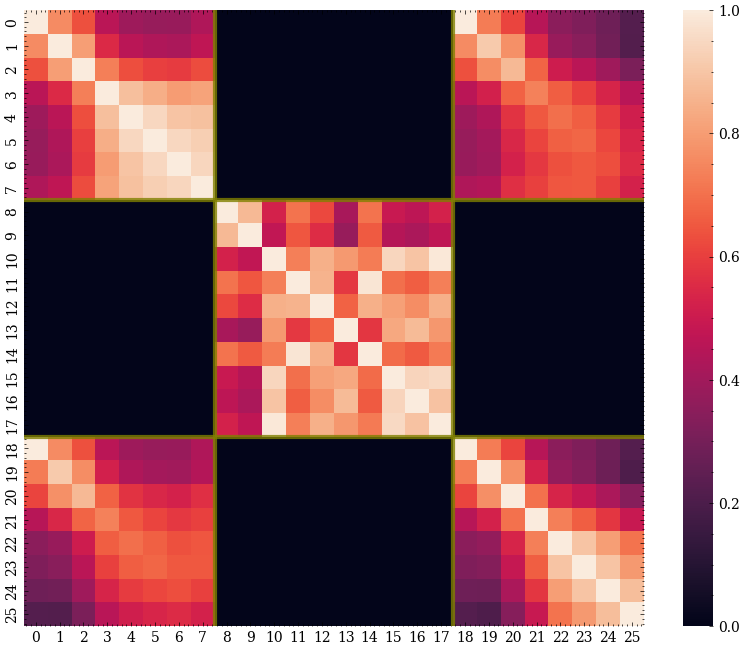

In [11]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

ax = sns.heatmap(KT[1:,1:], annot=False, vmin=0, vmax=1)

#labels = ['U2','U3','U4','U5','H2','H3','H4','H5','A3','A4','A5'] #df.columns

ax.hlines(separators, *ax.get_xlim(), linewidth=3, color='olive',alpha=0.8)
ax.vlines(separators, *ax.get_ylim(), linewidth=3, color='olive',alpha=0.8)

#ax.set_yticklabels(labels, rotation=0)
#ax.set_xticklabels(labels, rotation=0)

plt.savefig("../../Figures/KT-DIS_heatmap.svg")

plt.show()

In [12]:
def drop_H(KT, type_dict, labels):
    """
    Keep only the parts corresponding to the UPHEC and the Blowup
    """

    lenu = type_dict["U"]
    lenh = type_dict["H"]
    lenuh = lenu + lenh
    lena = type_dict["A"]
    
    KT_reduced = np.zeros([lenu+lena,lenu+lena])

    # UU
    KT_reduced[0:lenu, 0:lenu] = KT[1:lenu+1,1:lenu+1]
    # UA, AU
    KT_reduced[0:lenu, lenu:lenu+lena] = KT[1:lenu+1,1+lenuh:1+lenuh+lena]
    KT_reduced[lenu:lenu+lena, 0:lenu] = KT[1+lenuh:1+lenuh+lena,1:lenu+1]
    # AA
    KT_reduced[lenu:lenu+lena, lenu:lenu+lena] = KT[1+lenuh:1+lenuh+lena,1+lenuh:1+lenuh+lena]

    labels_reduced = ["U2/B2"] + labels[1:lenu] + [lab.replace("A","B") for lab in labels[lenuh:lenuh+lena]]
    
    return KT_reduced, labels_reduced

KT_reduced, labels_reduced = drop_H(KT, type_dict, labels)

In [14]:
labels_reduced

['U2/B2',
 'U3',
 'U4',
 'U5',
 'U6',
 'U7',
 'U8',
 'U9',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'B7',
 'B8',
 'B9']

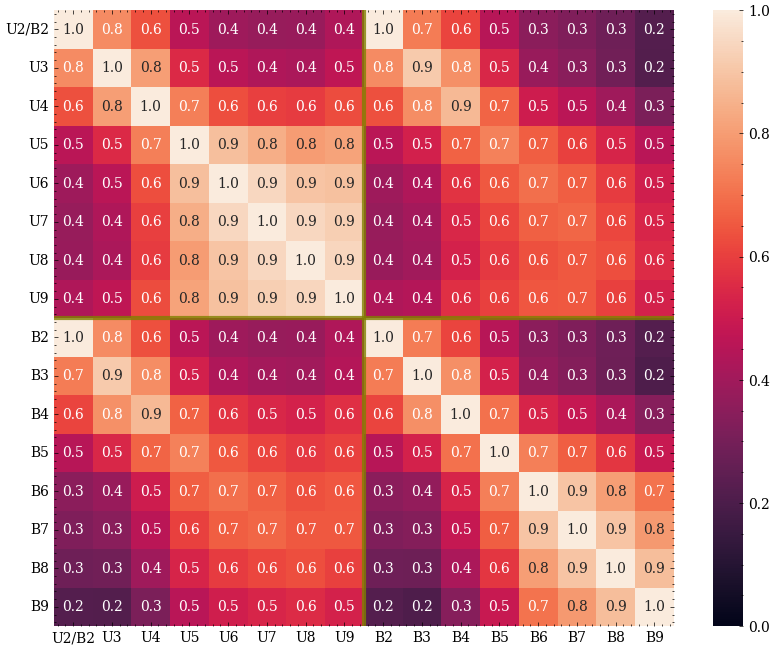

In [16]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

ax = sns.heatmap(KT_reduced, annot=True, fmt=".1f", vmin=0, vmax=1)

ax.hlines(type_dict["U"], *ax.get_xlim(), linewidth=3, color='olive',alpha=0.8)
ax.vlines(type_dict["U"], *ax.get_ylim(), linewidth=3, color='olive',alpha=0.8)

ax.set_yticklabels(labels_reduced, rotation=0)
ax.set_xticklabels(labels_reduced, rotation=0)

plt.savefig("../../Figures/KT-DIS_reduc_heatmap.svg")

plt.show()

## Top-K ranking


In [23]:
## Top K nodes based on a centrality dictionary ##
def topK(cent, K=None, return_list=False):
    """
    Given a dictionary node-centrality score, return the top K ranking
    """

    if not K:
        K = len(cent)
    
    C = sorted(cent, key=cent.get, reverse=True)[:K]
    ranking = {key: cent[key] for key in C}
    
    if return_list:
        return C

    return ranking

In [24]:
dictlist = df.to_dict()

In [25]:
for key1, value1 in dictlist.items():
    print(key1, topK(value1,K=10).keys())

CEC dict_keys([92, 70, 354, 264, 356, 185, 162, 388, 255, 353])
UPHEC-2 dict_keys([92, 70, 354, 162, 356, 456, 264, 388, 185, 251])
UPHEC-3 dict_keys([92, 70, 456, 356, 255, 353, 185, 187, 313, 492])
UPHEC-4 dict_keys([456, 92, 70, 356, 255, 353, 185, 187, 313, 492])
UPHEC-5 dict_keys([456, 92, 70, 356, 255, 353, 185, 187, 313, 492])
HEC-2unif dict_keys([79, 112, 465, 309, 299, 247, 130, 145, 50, 283])
HEC-3unif dict_keys([120, 293, 169, 185, 195, 503, 402, 447, 335, 347])
HEC-4unif dict_keys([92, 354, 10, 76, 136, 185, 376, 281, 332, 162])
HEC-5unif dict_keys([70, 388, 485, 151, 356, 27, 368, 434, 162, 136])
AltUnif-3 dict_keys([92, 70, 456, 356, 185, 255, 353, 187, 313, 492])
AltUnif-4 dict_keys([456, 92, 70, 356, 185, 255, 353, 187, 313, 492])
AltUnif-5 dict_keys([455, 91, 184, 69, 355, 352, 254, 186, 312, 491])


In [26]:
KTtopK = defaultdict(list)

for key1, value1 in dictlist.items():
    
    print("Comparing", key1, "against the rest.")
    
    for key2, value2 in dictlist.items():
        
        if key1 == key2:
            continue
        
        for k in range(1, len(df)):
                        
            topk1 = topK(value1, K=k)
            centrals2 = [value2[node] for node in topk1.keys()]
            
            KTtopK[key1 + " -> " + key2].append( scipy.stats.kendalltau(list(topk1.values()), centrals2).statistic )

Comparing CEC against the rest.
Comparing UPHEC-2 against the rest.
Comparing UPHEC-3 against the rest.
Comparing UPHEC-4 against the rest.
Comparing UPHEC-5 against the rest.
Comparing HEC-2unif against the rest.
Comparing HEC-3unif against the rest.
Comparing HEC-4unif against the rest.
Comparing HEC-5unif against the rest.
Comparing AltUnif-3 against the rest.
Comparing AltUnif-4 against the rest.
Comparing AltUnif-5 against the rest.


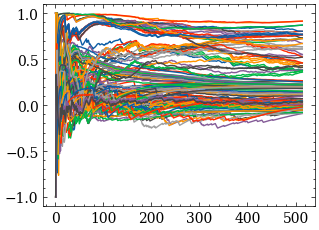

In [27]:
for key, val in KTtopK.items():
    plt.plot(val, label=key)
    
#plt.legend()

## Separate plots per pairwise comparison

In [28]:
# Colormap for the plots
cmap = plt.get_cmap('rainbow') #rainbow, hsv, viridis, cool

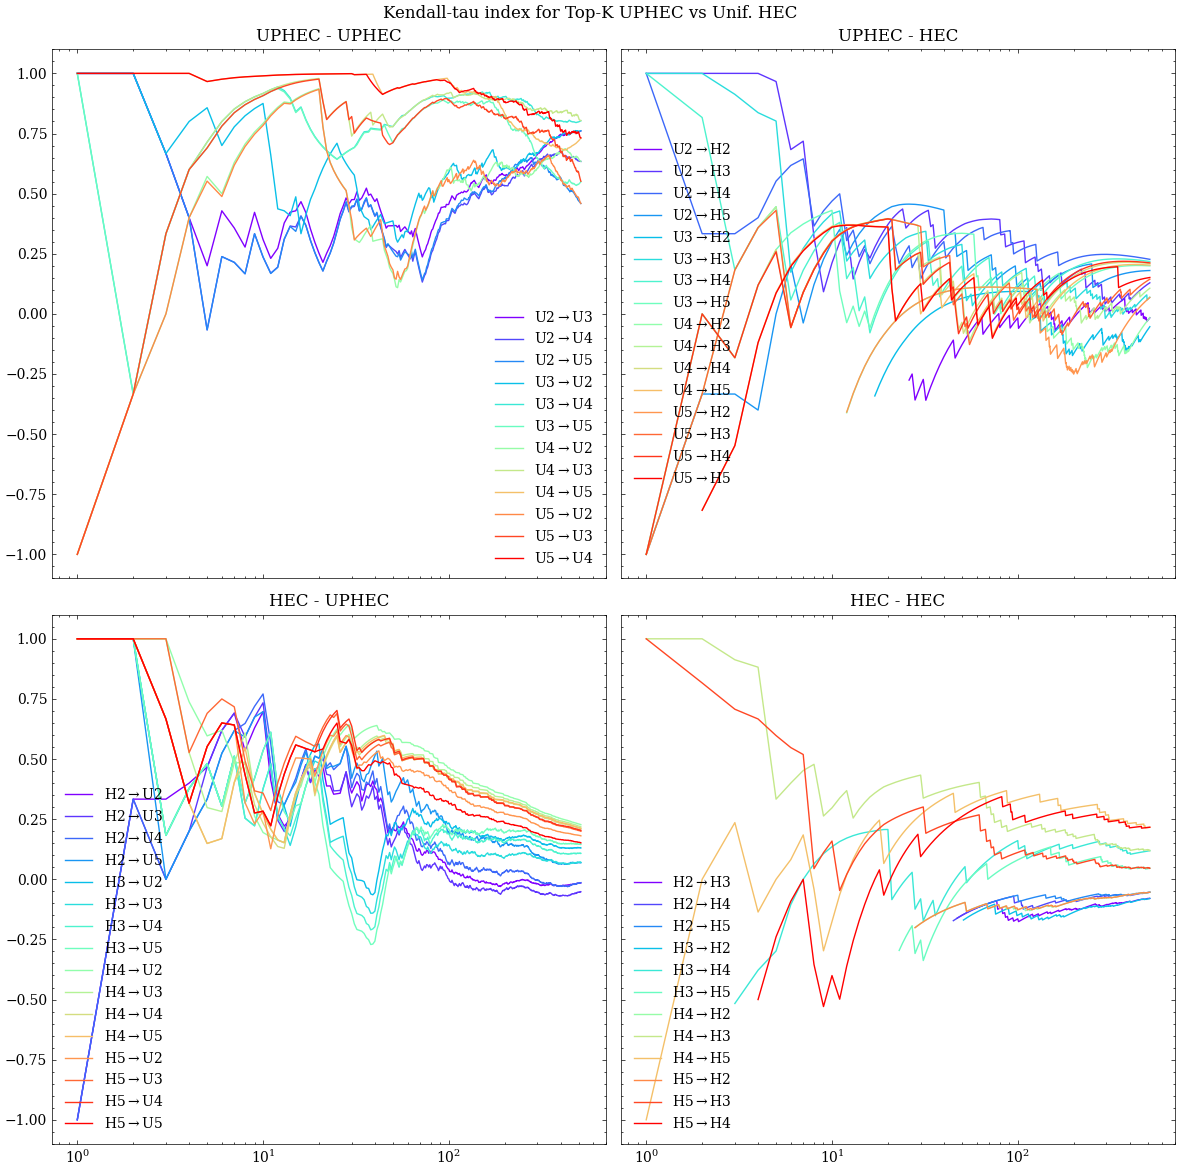

In [29]:
fig, ax = plt.subplots(2,2, figsize=(12,12), sharex=True, sharey=True)
# Colormap for the plots
cmap = plt.get_cmap('rainbow') #rainbow, hsv, viridis, cool
fig.suptitle("Kendall-tau index for Top-K UPHEC vs Unif. HEC")

colorUU = iter(cmap(np.linspace(0, 1, 4*3)))
colorUH = iter(cmap(np.linspace(0, 1, 4*4)))
colorHU = iter(cmap(np.linspace(0, 1, 4*4)))
colorHH = iter(cmap(np.linspace(0, 1, 4*3)))

for key, val in KTtopK.items():
    
    if "UP" in key[0:3] and "UP" in key[-8:]:
        
        ax[0,0].plot(val, label=f"U{key[6]}" + r"$\rightarrow$"+ f"U{key[-1]}", color=next(colorUU))
        ax[0,0].set_title("UPHEC - UPHEC")
    
    elif "UP" in key[0:3] and "unif" in key[-5:]:
        
        ax[0,1].plot(val, label=f"U{key[6]}" + r"$\rightarrow$"+ f"H{key[-5]}", color=next(colorUH))
        ax[0,1].set_title("UPHEC - HEC")
    
    elif "unif" in key[0:9] and "UP" in key[-8:]:
        
        ax[1,0].plot(val, label=f"H{key[4]}" + r"$\rightarrow$"+ f"U{key[-1]}", color=next(colorHU))
        ax[1,0].set_title("HEC - UPHEC")
    
    elif "unif" in key[0:9] and "unif" in key[-5:]:
        
        ax[1,1].plot(val, label=f"H{key[4]}" + r"$\rightarrow$"+ f"H{key[-5]}", color=next(colorHH))
        ax[1,1].set_title("HEC - HEC")
        

ax[0,0].set_xscale('log')
ax[0,1].set_xscale('log')
ax[1,0].set_xscale('log')
ax[1,1].set_xscale('log')

        
ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()

plt.tight_layout()

plt.show()

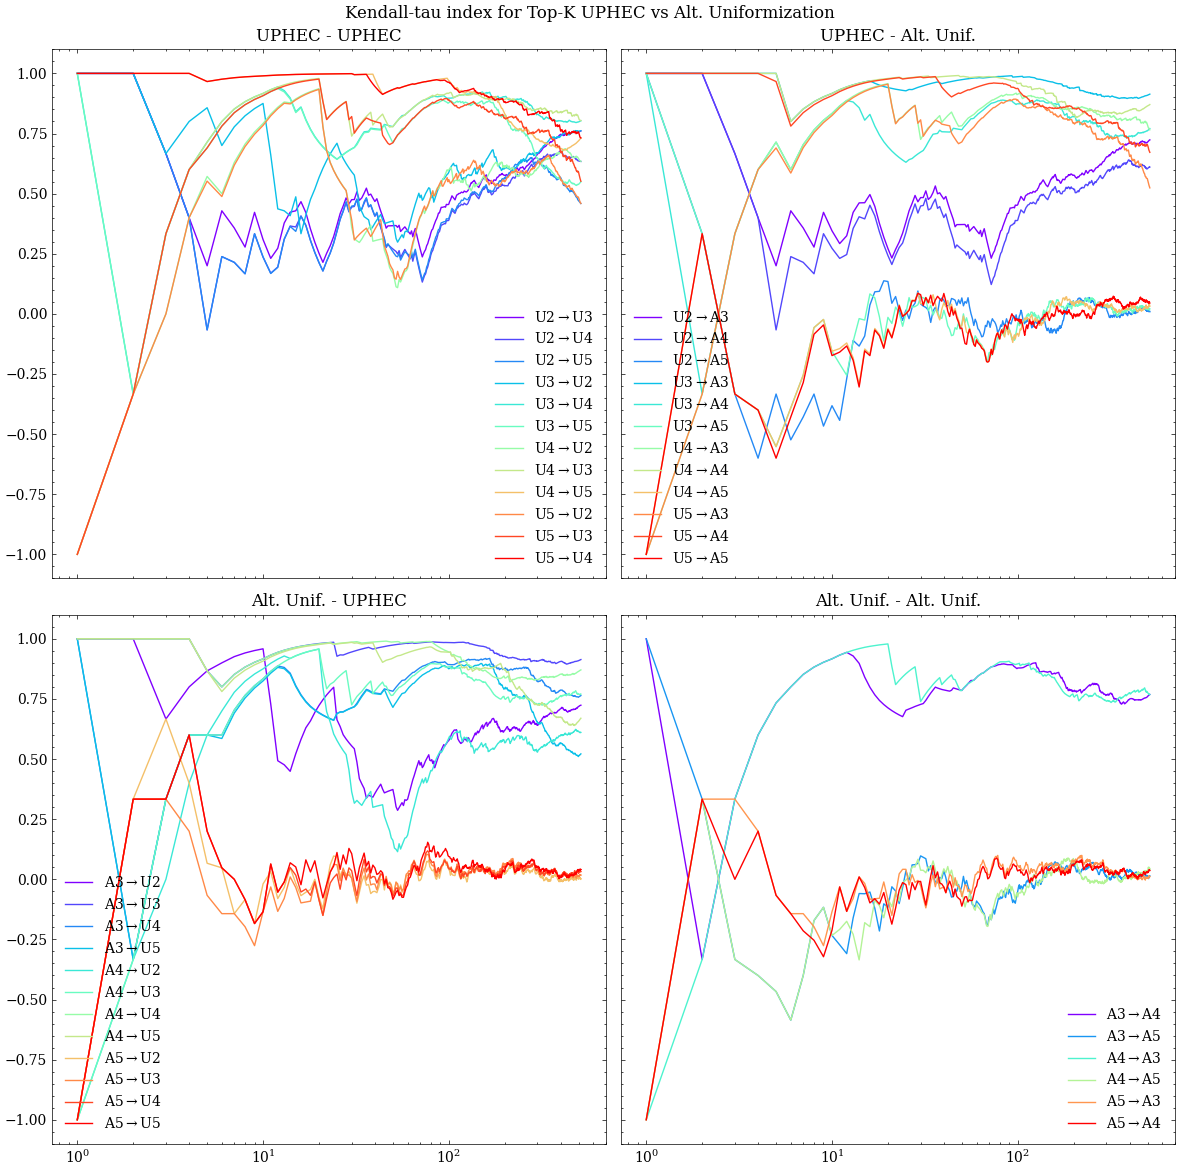

In [30]:
fig, ax = plt.subplots(2,2, figsize=(12,12), sharex=True, sharey=True)

fig.suptitle("Kendall-tau index for Top-K UPHEC vs Alt. Uniformization")

colorUU = iter(cmap(np.linspace(0, 1, 4*3)))
colorUA = iter(cmap(np.linspace(0, 1, 4*3)))
colorAU = iter(cmap(np.linspace(0, 1, 4*3)))
colorAA = iter(cmap(np.linspace(0, 1, 2*3)))

for key, val in KTtopK.items():
    
    if "UP" in key[0:3] and "UP" in key[-8:]:
        
        ax[0,0].plot(val, label=f"U{key[6]}" + r"$\rightarrow$"+ f"U{key[-1]}", color=next(colorUU))
        ax[0,0].set_title("UPHEC - UPHEC")
    
    elif "UP" in key[0:3] and "Alt" in key[-9:]:
        
        ax[0,1].plot(val, label=f"U{key[6]}" + r"$\rightarrow$"+ f"A{key[-1]}", color=next(colorUA))
        ax[0,1].set_title("UPHEC - Alt. Unif.")
    
    elif "Alt" in key[0:8] and "UP" in key[-8:]:
        
        ax[1,0].plot(val, label=f"A{key[8]}" + r"$\rightarrow$"+ f"U{key[-1]}", color=next(colorAU))
        ax[1,0].set_title("Alt. Unif. - UPHEC")
    
    elif "Alt" in key[0:8] and "Alt" in key[-9:]:
        
        ax[1,1].plot(val, label=f"A{key[8]}" + r"$\rightarrow$"+ f"A{key[-1]}", color=next(colorAA))
        ax[1,1].set_title("Alt. Unif. - Alt. Unif.")
        
        
ax[0,0].set_xscale('log')
ax[0,1].set_xscale('log')
ax[1,0].set_xscale('log')
ax[1,1].set_xscale('log')


ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()

plt.tight_layout()

plt.show()

## 2x3 grid figure

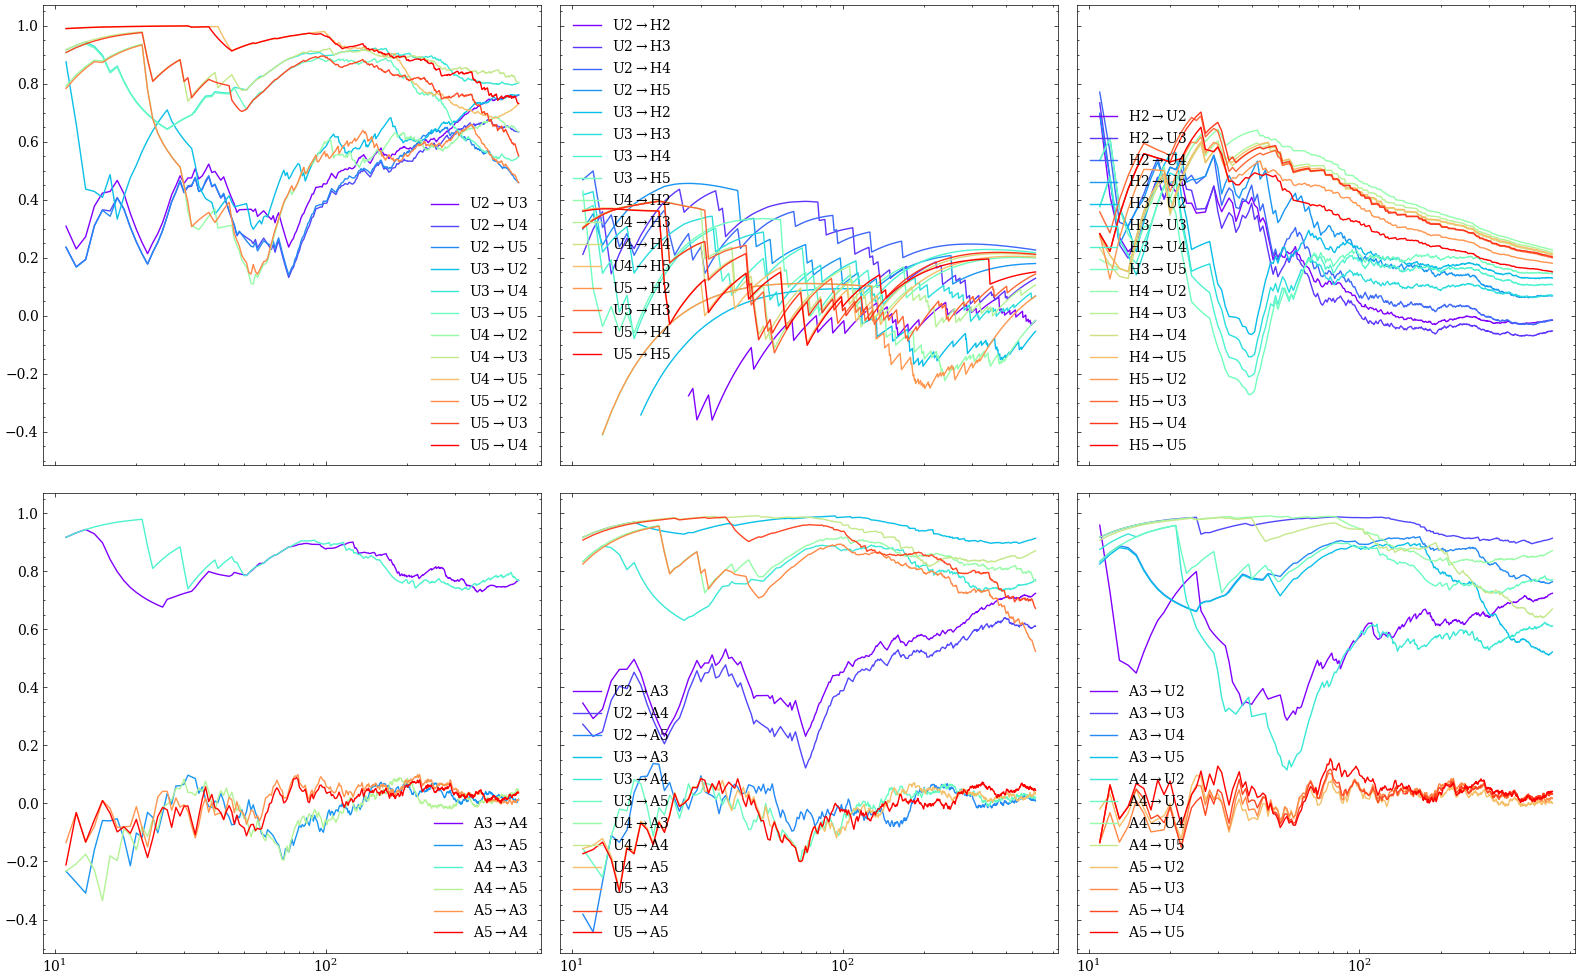

In [36]:
fig, ax = plt.subplots(2,3, figsize=(16,10), sharex=True, sharey=True)

#fig.suptitle("Kendall-tau index for Top-K UPHEC vs Alt. Uniformization")

colorUU = iter(cmap(np.linspace(0, 1, 4*3)))
colorUH = iter(cmap(np.linspace(0, 1, 4*4)))
colorHU = iter(cmap(np.linspace(0, 1, 4*4)))

colorAA = iter(cmap(np.linspace(0, 1, 2*3)))
colorUA = iter(cmap(np.linspace(0, 1, 4*3)))
colorAU = iter(cmap(np.linspace(0, 1, 4*3)))

for key, val in KTtopK.items():
    
    
    if "UP" in key[0:3] and "UP" in key[-8:]:
        
        ax[0,0].plot(range(11,len(df)), val[10:],
                     label=f"U{key[6]}" + r"$\rightarrow$"+ f"U{key[-1]}", color=next(colorUU))
        #ax[0,0].set_title("UPHEC - UPHEC")
    
    elif "UP" in key[0:3] and "unif" in key[-5:]:
        
        ax[0,1].plot(range(11,len(df)), val[10:],
                     label=f"U{key[6]}" + r"$\rightarrow$"+ f"H{key[-5]}", color=next(colorUH))
        #ax[0,1].set_title("UPHEC - HEC")
    
    elif "unif" in key[0:9] and "UP" in key[-8:]:
        
        ax[0,2].plot(range(11,len(df)), val[10:],
                     label=f"H{key[4]}" + r"$\rightarrow$"+ f"U{key[-1]}", color=next(colorHU))
        #ax[0,2].set_title("HEC - UPHEC")
    
    
    elif "Alt" in key[0:8] and "Alt" in key[-9:]:
        
        ax[1,0].plot(range(11,len(df)), val[10:],
                     label=f"A{key[8]}" + r"$\rightarrow$"+ f"A{key[-1]}", color=next(colorAA))
        #ax[1,0].set_title("Alt. Unif. - Alt. Unif.")
    
    elif "UP" in key[0:3] and "Alt" in key[-9:]:
        
        ax[1,1].plot(range(11,len(df)), val[10:],
                     label=f"U{key[6]}" + r"$\rightarrow$"+ f"A{key[-1]}", color=next(colorUA))
        #ax[1,1].set_title("UPHEC - Alt. Unif.")
    
    elif "Alt" in key[0:8] and "UP" in key[-8:]:
        
        ax[1,2].plot(range(11,len(df)), val[10:],
                     label=f"A{key[8]}" + r"$\rightarrow$"+ f"U{key[-1]}", color=next(colorAU))
        #ax[1,2].set_title("Alt. Unif. - UPHEC")
        
        
ax[0,0].set_xscale('log')
ax[0,1].set_xscale('log')
ax[0,2].set_xscale('log')
ax[1,0].set_xscale('log')
ax[1,1].set_xscale('log')
ax[1,2].set_xscale('log')


ax[0,0].legend()
ax[0,1].legend()
ax[0,2].legend()
ax[1,0].legend()
ax[1,1].legend()
ax[1,2].legend()

plt.tight_layout()

#plt.savefig("Figures/KT_topK_comparisons.svg")

plt.show()

## Simplified, final figure

In [37]:
axisdict = {}
datadict = {}

for key, val in KTtopK.items():    
    
    if "UP" in key[0:3] and "UP" in key[-8:]:
        
        label=f"U{key[6]}" + r"$\rightarrow$"+ f"U{key[-1]}"
        axisdict[label] = (0,0)
        datadict[label] = val[10:]
    
    elif "UP" in key[0:3] and "unif" in key[-5:]:
        
        label=f"U{key[6]}" + r"$\rightarrow$"+ f"H{key[-5]}"
        axisdict[label] = (0,1)
        datadict[label] = val[10:]
        
    elif "unif" in key[0:9] and "UP" in key[-8:]:
        
        label=f"H{key[4]}" + r"$\rightarrow$"+ f"U{key[-1]}"
        axisdict[label] = (0,2)
        datadict[label] = val[10:]
        
    
    elif "Alt" in key[0:8] and "Alt" in key[-9:]:

        label=f"A{key[8]}" + r"$\rightarrow$"+ f"A{key[-1]}"
        axisdict[label] = (1,0)
        datadict[label] = val[10:]
        
    elif "UP" in key[0:3] and "Alt" in key[-9:]:
        
        label=f"U{key[6]}" + r"$\rightarrow$"+ f"A{key[-1]}"
        axisdict[label] = (1,1)
        datadict[label] = val[10:]
        
    elif "Alt" in key[0:8] and "UP" in key[-8:]:
        
        label=f"A{key[8]}" + r"$\rightarrow$"+ f"U{key[-1]}"
        axisdict[label] = (1,2)
        datadict[label] = val[10:]
        

In [38]:
maxs = {}
mins = {}
means = {}

for label, data in datadict.items():
    maxs[label] = max(data)
    mins[label] = min(data)
    means[label] = np.mean(data)

In [39]:
# Filter what to plot
labels_to_plot = set()
for axis in [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]:
    
    axlabels = [label for label in maxs.keys() if axisdict[label] == axis]
    
    maxax = [maxim for label, maxim in maxs.items() if axisdict[label] == axis]
    
    labels_to_plot.add(axlabels[maxax.index(max(maxax))])
    
    minax = [minim for label, minim in mins.items() if axisdict[label] == axis]
    
    labels_to_plot.add(axlabels[minax.index(min(minax))])
    
    meanax = [mean for label, mean in means.items() if axisdict[label] == axis]
    
    labels_to_plot.add(axlabels[meanax.index(max(meanax))])
    labels_to_plot.add(axlabels[meanax.index(min(meanax))])
    

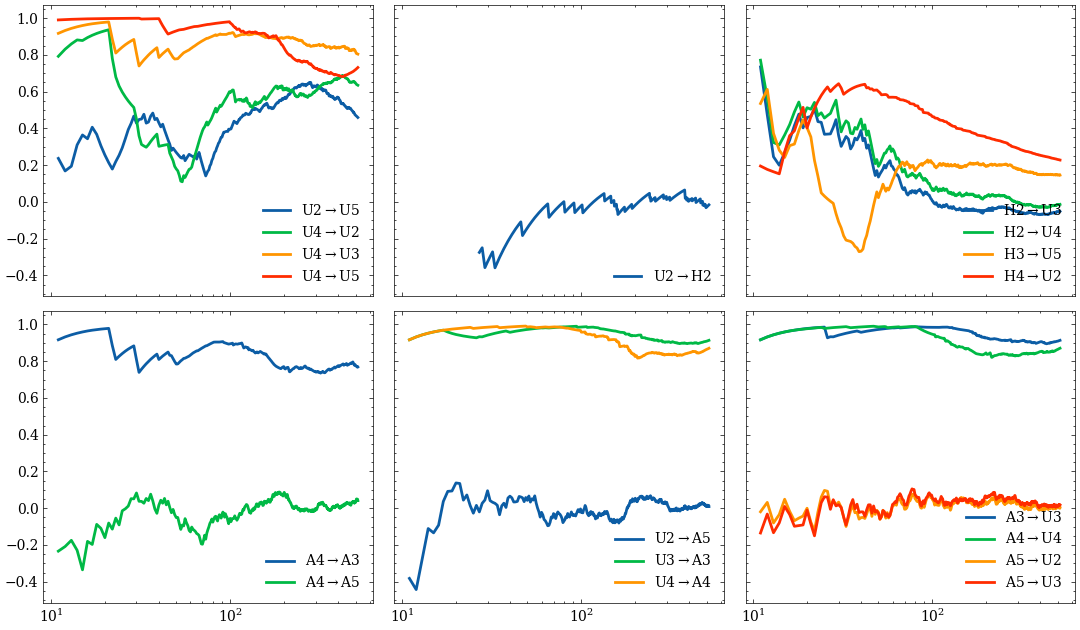

In [40]:
fig, ax = plt.subplots(2,3, figsize=(11,6.5), sharex=True, sharey=True)

#fig.suptitle("Kendall-tau index for Top-K UPHEC vs Alt. Uniformization")

for label, data in datadict.items():
    
    if label in labels_to_plot:
        ax[axisdict[label][0],axisdict[label][1]].plot(range(11,len(df)), data,
                                                       label=label, linewidth=2)
    
        
ax[0,0].set_xscale('log')
ax[0,1].set_xscale('log')
ax[0,2].set_xscale('log')
ax[1,0].set_xscale('log')
ax[1,1].set_xscale('log')
ax[1,2].set_xscale('log')


ax[0,0].legend(loc="lower right")
ax[0,1].legend(loc="lower right")
ax[0,2].legend(loc="lower right")
ax[1,0].legend(loc="lower right")
ax[1,1].legend(loc="lower right")
ax[1,2].legend(loc="lower right")

plt.tight_layout()

#plt.savefig("Figures/diseasome_KT_topK_comparisons_simple.svg")

plt.show()